# Notebook n°6: Détection de poses (Mediapipe)
### Source : Bazarevsky, V., Grishchenko, I., Raveendran, K., Zhu, T., Zhang, F., & Grundmann, M. (2020). BlazePose: On-device Real-time Body Pose tracking. doi:10.48550/ARXIV.2006.10204

## 1) Importation des librairies

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.0 MB 256 kB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.12.6 which is incompatible.


In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import os

## 2) Création du modèle et des fonctions de pré/post-processing

In [ ]:
# structure for angles storage
angles = []
angles_names = ["left_elbow", "right_elbow", "left_shoulder", "right_shoulder", "left_hip", "right_hip",
                "left_knee", "right_knee", "left_foot", "right_foot", "label"]

In [ ]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def detect_pose(img_name, image_pose, pose, draw=False):
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    result = pose.process(image_in_RGB)

    if draw:
        mp_drawing.draw_landmarks(image=image_in_RGB,
                                  landmark_list=result.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(151,255,255), thickness=2, circle_radius=5),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,205,205), thickness=2, circle_radius=2)
                                  )

        plt.figure()
        plt.imshow(image_in_RGB)
        plt.title(img_name)
        plt.axis('off')
        plt.show()

    return result


def get_angle(landmarks, idx):
    if landmarks[idx[0]].visibility > 0.8 and landmarks[idx[1]].visibility > 0.8 and landmarks[idx[2]].visibility > 0.8:
      a = np.array([landmarks[idx[0]].x, landmarks[idx[0]].y, landmarks[idx[0]].z])
      b = np.array([landmarks[idx[1]].x, landmarks[idx[1]].y, landmarks[idx[1]].z])
      c = np.array([landmarks[idx[2]].x, landmarks[idx[2]].y, landmarks[idx[2]].z])

      radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
      angle = np.abs(radians * 180.0 / np.pi)

      if angle > 180.0:
        angle = 360 - angle

      return round(angle, 6)
    return None

## 3) Evaluation du modèle

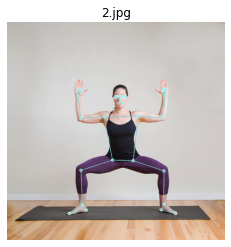

0.7573678493499756


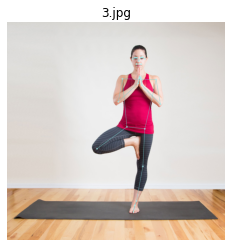

1.3446924686431885


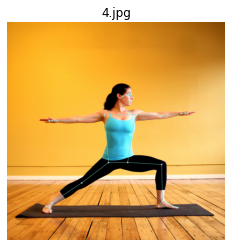

0.6219396591186523


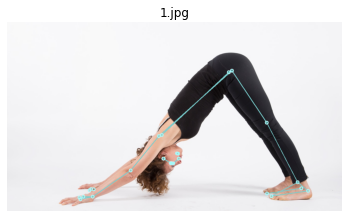

0.24283719062805176


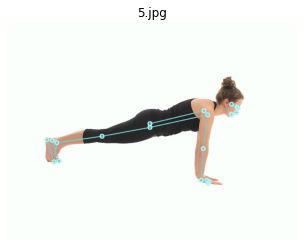

0.22509193420410156


In [ ]:
from mediapipe.python import ImageFormat
import time

# Here we will read our image from the specified path to detect the pose
path = "data/"

for img in os.listdir(path):
    t1 = time.time()
    img_arr = cv2.imread(path + img, cv2.IMREAD_COLOR)
    landmarks = detect_pose(img, img_arr, pose_image, True).pose_landmarks.landmark

    angles.append(
        {
            "left_elbow": get_angle(landmarks, [16, 14, 12]),
            "right_elbow": get_angle(landmarks, [15, 13, 11]),
            "left_shoulder": get_angle(landmarks, [14, 12, 24]),
            "right_shoulder": get_angle(landmarks, [13, 11, 23]),
            "left_hip": get_angle(landmarks, [12, 24, 26]),
            "right_hip": get_angle(landmarks, [11, 23, 25]),
            "left_knee": get_angle(landmarks, [24, 26, 28]),
            "right_knee": get_angle(landmarks, [23, 25, 27]),
            "left_foot": get_angle(landmarks, [26, 28, 32]),
            "right_foot": get_angle(landmarks, [25, 27, 31]),
            "img": img
        }
    )

    print(time.time() - t1)

In [ ]:
angles

[{'left_elbow': 92.83432,
  'right_elbow': 93.081043,
  'left_shoulder': 97.571411,
  'right_shoulder': 92.256587,
  'left_hip': 96.726329,
  'right_hip': 101.966396,
  'left_knee': 105.063089,
  'right_knee': 108.095742,
  'left_foot': 119.272738,
  'right_foot': 128.63382,
  'img': '2.jpg'},
 {'left_elbow': 36.8538,
  'right_elbow': 34.484605,
  'left_shoulder': 15.665782,
  'right_shoulder': 22.702215,
  'left_hip': 120.774197,
  'right_hip': 169.907129,
  'left_knee': None,
  'right_knee': 172.371851,
  'left_foot': None,
  'right_foot': 174.43594,
  'img': '3.jpg'},
 {'left_elbow': 171.403289,
  'right_elbow': 173.013192,
  'left_shoulder': 83.276863,
  'right_shoulder': 97.386551,
  'left_hip': 122.696245,
  'right_hip': 84.14454,
  'left_knee': 176.117578,
  'right_knee': 94.680275,
  'left_foot': 125.615528,
  'right_foot': 116.186675,
  'img': '4.jpg'},
 {'left_elbow': None,
  'right_elbow': 165.843604,
  'left_shoulder': None,
  'right_shoulder': 172.751674,
  'left_hip': Non